# Plotting and Data Visualization

```{admonition} Overview
:class: overview

Questions:

* How do I visualize data by making graphs?

Objectives:

* Plot data to visualize results.

* Label plot axes and create a figure legend.

* Plot multiple graphs on one figure.

* Save figures to files.

```

Plotting is one of the most effective methods of representing numerical data and illustrating their patterns and trends. 
There are a number of applications that facilitate graph creation (Excel, Origin, SciDavis, etc.), but these methods can be time consuming, tedious, and at times inflexible. We have already seen the potential of coding for reading/editing/saving multiple files at once, as well as in creating tables from raw data in a ‘CSV’ file. Taking what we have learned so far, we will focus in this module on creating plots from the data in the previous lesson, customizing the plots with color, design, labels and legends, and using loops to create multiple figures at once.

From the previous lesson, remember that you should have a variable called data defined which contains the tabular data in `distance_data_headers.csv`. We will need to load in this data again.

## Loading Data

In [1]:
import numpy as np

distance_file = "data/distance_data_headers.csv"
distances = np.genfromtxt(distance_file, delimiter=",", dtype="unicode")
headers = distances[0]
data = distances[1:]
data = data.astype(float)

## Plotting Data
To graph our data, we will need a new python library that contains functions to plot data. To plot our data, we will use a Python library called matplotlib. 
The import we will use is `import matplotlib.pylot`. 
However, matplotlib.pyplot is a lot to type every time we make a plot. 
Often, when people import python modules they give them a shorthand name so that they have to type less. For example, `matplotlib.pyplot` is commonly shortened to `plt`. You’ll see this in official documentation for matplotlib. 

In [2]:
import matplotlib.pyplot as plt

A data set is plotted using the ‘plot()’ function of `matplotlib.pyplot` (or of `plt`, since we shortened the name in our import).

First, we use the `plt.figure` command to create a new figure,
then we use `plt.plot` with arguments for what we want to plot.
We will plot the first column of data.

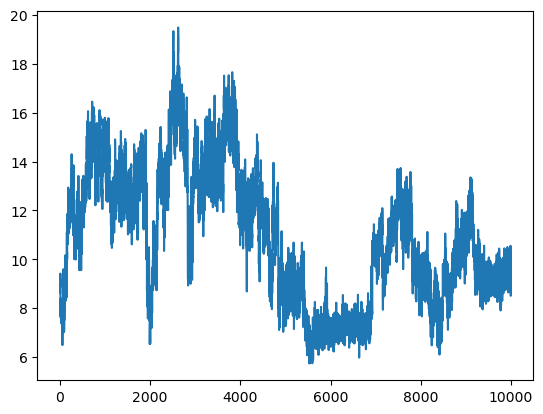

In [6]:
plt.figure()
plt.plot(data[:, 1])

## Plotting with X and Y

The data here are relatively straightforward, with the Frame column serving as a simple x value for the rest of the columns. 
Often however, it is necessary to show trends or patterns in data in relation to a variety of independent variables. 
If you have data that contains multiple x columns, it can be helpful to specify the x and y values we wish to use. 
In with ‘pyplot’, the first two parameters in the `plot()` function are `x` and `y` by default.

Using both will result in a figure that is almost identical to what we saw before when we didn't use `X` and `Y`.

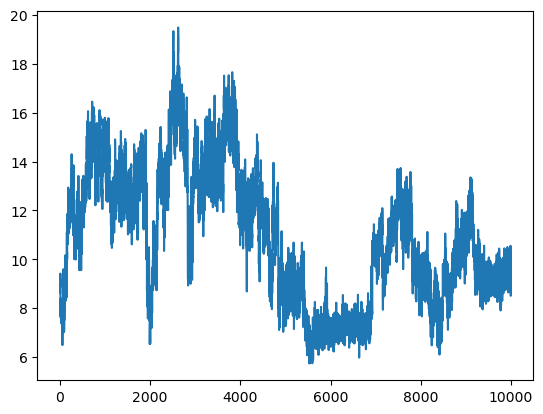

In [9]:
plt.figure()
plt.plot(data[:,0], data[:,1])

`x` and `y` must also be specified if we wanted to plot the data non-sequentially, say at regular intervals. 
To do this we will use a new slicing syntax. 
To select frames at regular intervals, we can use the syntax `array[start:stop:interval]`.

### Slicing at regular intervals

Let’s start with viewing this slice in a table


In [22]:
print(data[0:1000:100,1:])    # to use the whole data set, simply leave out the stopping point integer, as before

[[ 8.9542  5.8024 11.5478  9.9557]
 [ 9.0139  5.7436 13.9145 10.7853]
 [11.506   8.9265 15.2785 12.0995]
 [13.2053  7.6506 15.8632 12.0482]
 [10.8274  7.6897 14.1698 12.2827]
 [13.0953  7.6354 15.6024 12.567 ]
 [15.1074  5.9674 14.8006  9.6562]
 [14.6342  6.2847 14.4311  9.7521]
 [14.0266  7.6997 12.956   9.7198]
 [15.0463  6.7667 13.9174  9.3867]]


Here is our new figure:

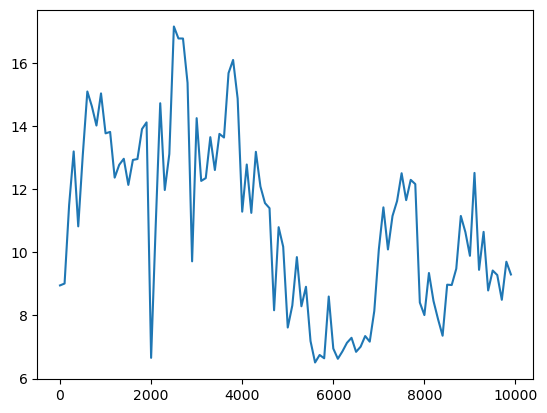

In [23]:
plt.figure()
plt.plot(data[::100,0], data[::100,1])

### Labels and Legends

To add labels and legends, add them to the initialized figure using functions belonging to `plt`. 
To add a label on the x-axis, we use `plt.xlabel`. 
To add a label on the y-axis, we use `plt.ylabel`.

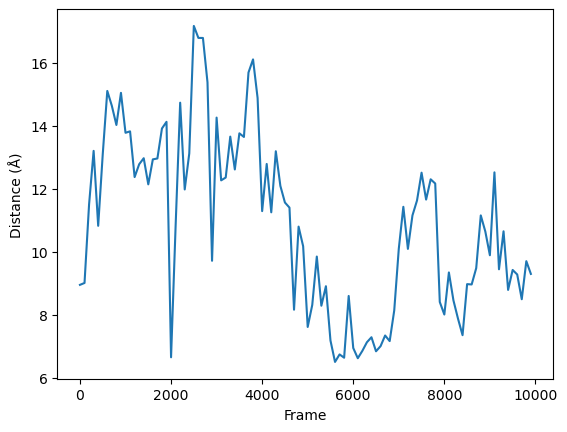

In [25]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
fig_1 = plt.plot(data[::100,0], data[::100,1])

Finally, to add a legend, we add the `label` argument to our plot
command, then use the command `plt.legend()` to make sure the legend shows up.

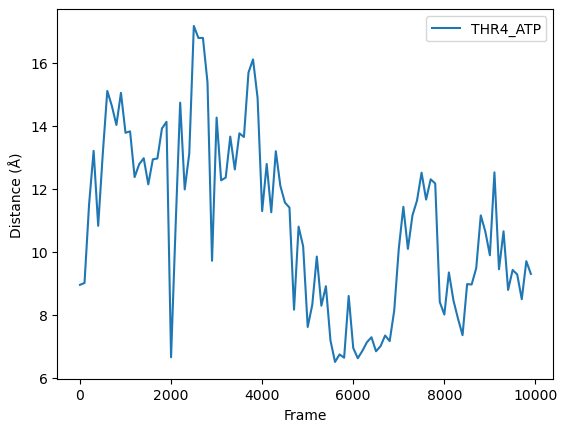

In [26]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
fig_1 = plt.plot(data[::100,0], data[::100,1], label=headers[1])
plt.legend()

### Saving Figures and Image Resolution

If you'd like to save your plot as an image outside of this notebook, you can use the `savefig` function. 
The argument to this function is a string that represents the path
where you'd like to save the image.
For example, we can save the image as a `png` in our current folder:


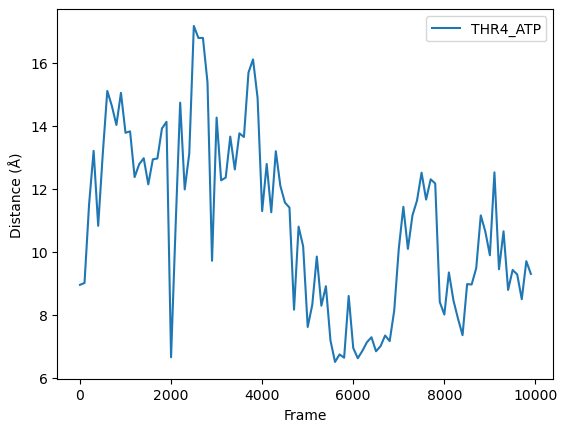

In [27]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
fig_1 = plt.plot(data[::100,0], data[::100,1], label=headers[1])
plt.legend()

plt.savefig(f"{headers[1]}.png")

After executing this code, check the directory you are working in. You should have an image called `THR4_ATP.png` that looks like the one displayed above and in your notebook.

Often, when you preparing images for your research, you will want to increase the image quality or resolution. This is easy to do with the savefig command we have been using. To increase the resolution your image is saved as, add the command `dpi=NUMBER` to the savefig command. dpi stands for “dots per inch”, and 300 is a resolution that is commonly used for publications.

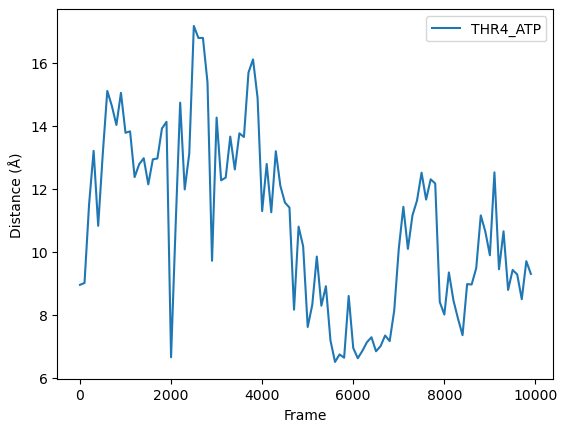

In [28]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
fig_1 = plt.plot(data[::100,0], data[::100,1], label=headers[1])
plt.legend()

plt.savefig(f"{headers[1]}.png", dpi=300)

Matplotlib can also save vector images like `pdf` or `svg`.
To save as an `svg`, you simply change the extension of your image file name in the `savefig` command.

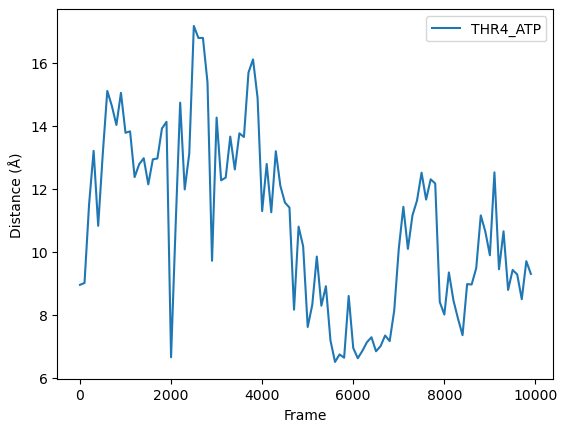

In [29]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
fig_1 = plt.plot(data[::100,0], data[::100,1], label=headers[1])
plt.legend()

plt.savefig(f"{headers[1]}.svg")

## Plotting more than one set of data

Adding additional data sets to the same plot can be done with a NumPy array by providing multiple y values through slicing.

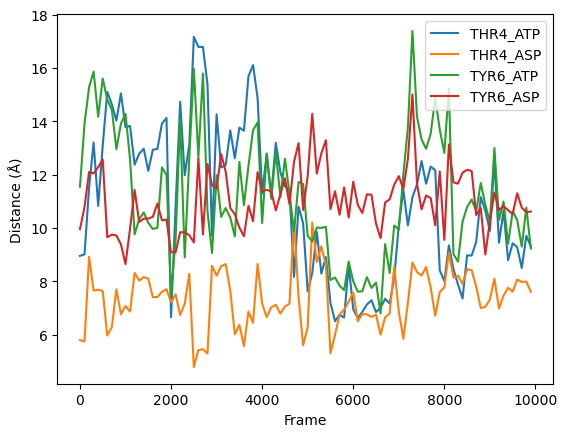

In [32]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters

plt.plot(data[::100,0], data[::100,1:], label=headers[1:])

plt.legend()

## Creating Multiple Plots

Alternatively, you might wish to create a plot for each data set.
One way this can be accomplished is by using a `for` loop.
You might also choose to use subplots in matplotlib, but that is
beyond the scope of this introductory lesson. 
To read more about subplots, you can see our [Python Visualization Workshop lesson](https://education.molssi.org/python-visualization/matplotlib/subplots.html).

To create this plot, we will use the `range` for loop that we saw in the previous lesson.

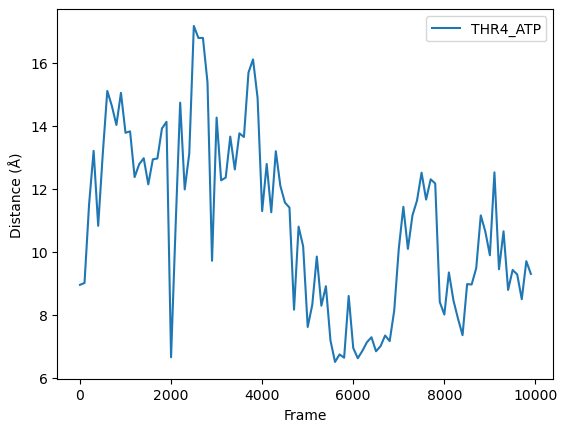

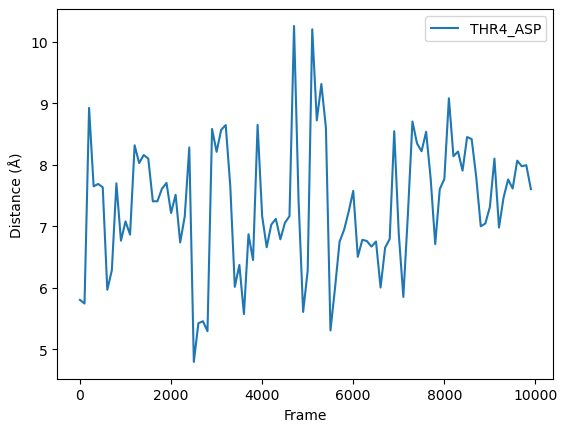

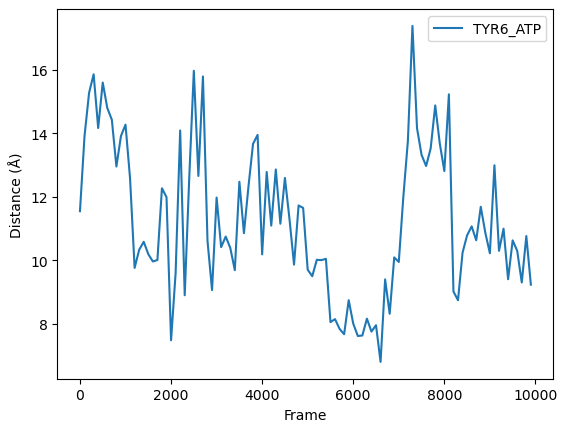

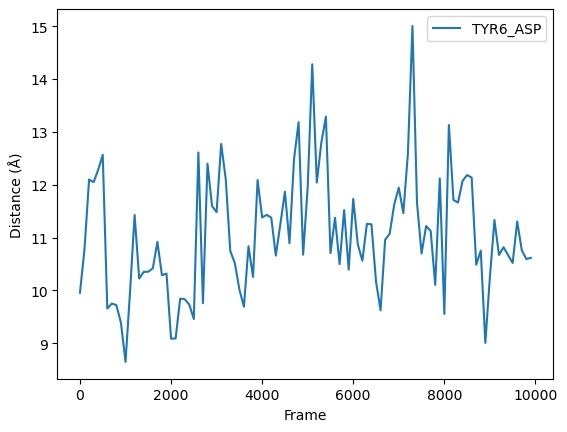

In [37]:
num_samples = len(headers)

# loop through the list of headers, creating a new figure with each cycle
for i in range(1, num_samples):
    plt.figure()
    plt.xlabel('Frame')
    plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters

    plt.plot(data[::100,0], data[::100,i], label=headers[i])

    plt.legend()

For the plots showing our data so far, the y axis limits have all been different. Since these data sets are related, you may want to have all of the plots show the same axis ranges. We can manually set the y axis range of an axis for a plot using the command `plt.ylim(low_limit, high_limit)`.

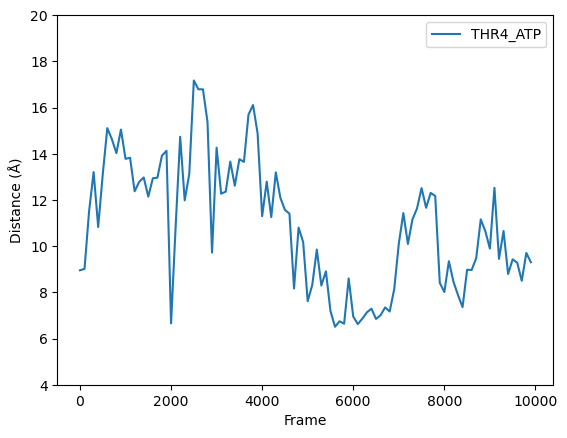

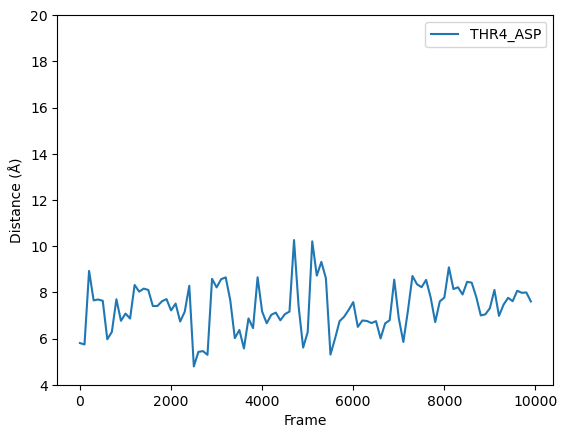

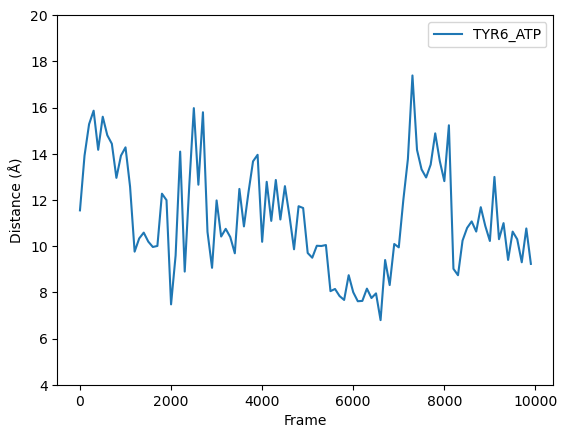

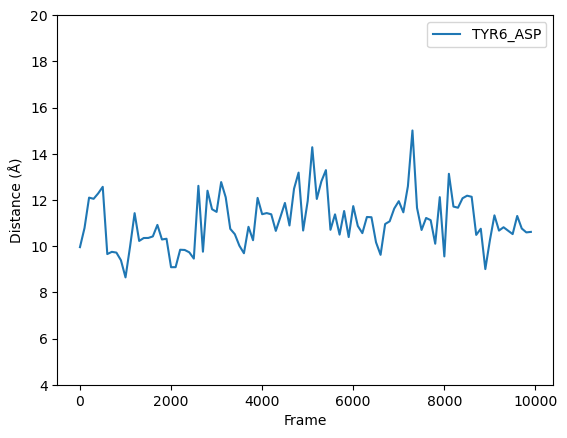

In [38]:
num_samples = len(headers)

# loop through the list of headers, creating a new figure with each cycle
for i in range(1, num_samples):
    plt.figure()
    plt.xlabel('Frame')
    plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
    plt.ylim(4, 20)
    
    plt.plot(data[::100,0], data[::100,i], label=headers[i])

    plt.legend()

## Customizing Plot Appearance

There are a variety of short strings that can be passed to the plot funtion convert the default line graph into a dashed line, scatter plot with various markers etc.

For example, we could add round markers to our plot by putting in the argument `marker="o"`.

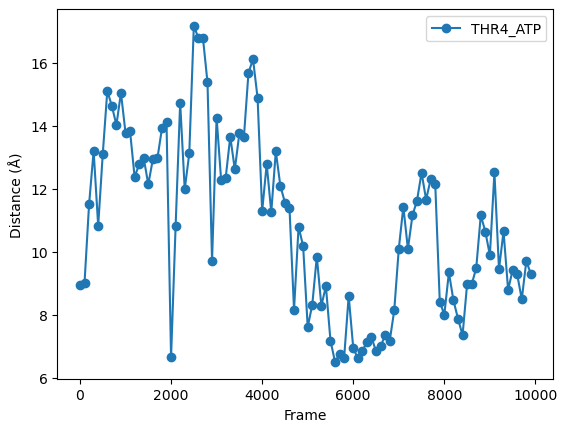

In [39]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters
fig_1 = plt.plot(data[::100,0], 
                 data[::100,1], 
                 label=headers[1],
                 marker="o")
plt.legend()

Here is a list of options you can use.

character | description
----------|------------
`'-'`	| solid line style
`'--'`	| dashed line style
 `'-.'` |	dash-dot line style
 `':'`  | dotted line style
 `'.'`  | point marker
 `','`  | pixel marker
 `'o'`  | circle marker
 `'v'`  | triangle_down marker
 `'^'`  | triangle_up marker
 `'<'`  | triangle_left marker
 `'>'`  | triangle_right marker
 `'1'`  | tri_down marker
 `'2'`  | tri_up marker
 `'3'`  | tri_left marker
 `'4'`  | tri_right marker
 `'s'`  | square marker
 `'p'`  | pentagon marker
 `'*'`  | star marker
 `'h'`  | hexagon1 marker
 `'H'`  | hexagon2 marker
 `'+'`  | plus marker
 `'x'`  | x marker
 `'D'`  | diamond marker
 `'d'`  | thin_diamond marker
 `'_'`  | hline marker

### Changing Color and Image Size

You can also specify the figure size by adding another argment to `plt.figure`, or set the color of your plotted line by adding a `color` argument to `plt.plot`

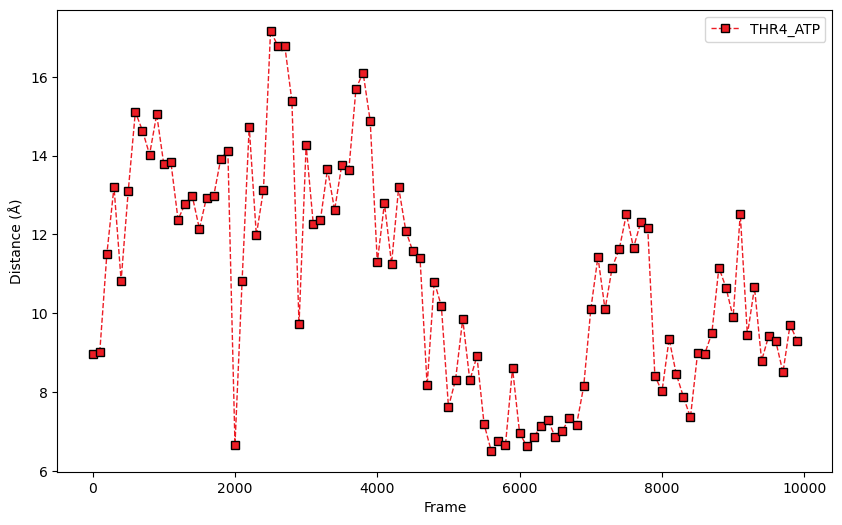

In [46]:
plt.figure(figsize=(10, 6))    # Set the figure size when you initialize the figure
plt.xlabel('Frame')
plt.ylabel('Distance (\u212B)')    # Gettin' fancy with unicode characters

# set colors and linewidths in the plot funtion. separating parameters in lines for readability
plt.plot(
    data[::100,0], 
    data[::100,1], 
    '--s', 
    color='#ed1c24',
    markersize=6, 
    markeredgecolor='000000',
    markeredgewidth=1,
    linewidth=1, 
    label=headers[1]
)
plt.legend()

Plots using matplotlib are almost infinitely customizable. 
To learn more about creating plots, we recommend you check out [MolSSI's visualization workshop](https://education.molssi.org/python-visualization/chapters/setup.html) and read the [official matplotlib documentation](https://matplotlib.org/stable/index.html).

``````{admonition} Key Points
:class: key

* You can create plots in Python using matplotlib.pyplot and the plot command.

* Add labels, legends, color, and other stylistic choices to figures by passing parameters to plot

* Use the matplotlib.pyplot function 'savefig()' to save the figure to a file

``````